## 00. Pacotes

In [ ]:
import pandas as pd
import numpy as np
import funcoes_basicas as funcs
import funcoes_derivadas as funcs_deriv
import random
import gc

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

from lightgbm import LGBMClassifier
import lightgbm as lgb
from itertools import combinations

# Filter out the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning

from datetime import date, datetime
from tqdm import tqdm
from scipy.stats import ks_2samp

import xgboost as xgb
import optuna
import pickle
import shap

from joblib import dump, load

def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y == 1], y_pred[y != 1]).statistic

ks_score = make_scorer(ks_stat)

# Definindo a semente
random.seed(123)

import warnings
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_rows', None)  # Exibir todas as linhas
pd.set_option('display.max_colwidth', None) # Exibir a largura máxima das colunas

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 01. Baixando a base

In [ ]:
# Baixando a base salva
df_base_backup = pd.read_parquet(r'D:\projeto_modelo_credito\dados\df_final_modelo_lgbm_sem_score.parquet',
                                 engine='pyarrow')
df_base_backup.head()

,SK_ID_CURR,TARGET,num__INCOME_TO_BIRTH_RATIO_publico,num__AMT_GOODS_PRICE_publico,num__DAYS_ID_PUBLISH_publico,num__CREDIT_TO_GOODS_RATIO_publico,num__DAYS_REGISTRATION_publico,num__DAYS_LAST_PHONE_CHANGE_publico,num__DAYS_BIRTH_publico,num__DAYS_EMPLOYED_publico,...,num__REGION_RATING_CLIENT_W_CITY_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo,num__CAR_TO_EMPLOYED_RATIO_publico,num__TOTALAREA_MODE_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo,periodo,score,prob0,prob1,predito
0,100010,0,-19.10,1530000.0,-2379.0,1.00,-4597.0,-1070.0,-18850.0,-449.0,...,3.0,-999.0,-0.02,-999.0000,-999.0,treino,675,0.674962,0.325038,0
1,100263,0,-4.60,585000.0,-4483.0,1.00,-2267.0,-2255.0,-23456.0,365243.0,...,2.0,133240.5,-999.00,0.0645,0.0,treino,791,0.790655,0.209345,0
2,100320,0,-18.76,463500.0,-4623.0,1.04,-2562.0,-842.0,-11996.0,-2907.0,...,2.0,-999.0,0.00,-999.0000,44203.5,treino,707,0.706704,0.293296,0
3,100704,0,-5.06,760500.0,-1291.0,1.00,-6650.0,-196.0,-17781.0,-7042.0,...,2.0,29682.0,-999.00,-999.0000,-999.0,treino,731,0.731402,0.268598,0
4,100768,0,-5.50,229500.0,-3991.0,1.21,-10241.0,-1643.0,-20438.0,-2271.0,...,2.0,-999.0,-0.01,0.0035,-999.0,treino,769,0.769192,0.230808,0


In [ ]:
df_base_backup.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'num__INCOME_TO_BIRTH_RATIO_publico',
 'num__AMT_GOODS_PRICE_publico',
 'num__DAYS_ID_PUBLISH_publico',
 'num__CREDIT_TO_GOODS_RATIO_publico',
 'num__DAYS_REGISTRATION_publico',
 'num__DAYS_LAST_PHONE_CHANGE_publico',
 'num__DAYS_BIRTH_publico',
 'num__DAYS_EMPLOYED_publico',
 'num__REGION_POPULATION_RELATIVE_publico',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo',
 'num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo',
 'num__PAYMENT_RATE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__CAR_TO_EMPLOYED_RATIO_publico',
 'num__TOTALAREA_MODE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_ex

In [ ]:
# vou pegaar somente o prob0 que é o score

df_base = df_base_backup[[
 'SK_ID_CURR',
 'TARGET',
 'prob0',
 'periodo']]

df_base.head()

,SK_ID_CURR,TARGET,prob0,periodo
0,100010,0,0.674962,treino
1,100263,0,0.790655,treino
2,100320,0,0.706704,treino
3,100704,0,0.731402,treino
4,100768,0,0.769192,treino


In [ ]:
# Baixando a base salva
df_scores_backup = pd.read_parquet(r'D:\projeto_modelo_credito\dados\df_final_modelo_lgbm_camada1.parquet',
                                 engine='pyarrow')
df_scores_backup.head()

,SK_ID_CURR,TARGET,num__EXT_SOURCE_3_publico,num__EXT_SOURCE_2_publico,num__EXT_SOURCE_1_publico,periodo,score,prob0,prob1,predito
0,100010,0,0.540654,0.714279,-999.000000,treino,963,0.963085,0.036915,0
1,100263,0,0.270707,0.235314,0.770814,treino,872,0.871889,0.128111,0
2,100320,0,-999.000000,0.610447,-999.000000,treino,920,0.920299,0.079701,0
3,100704,0,0.621226,0.398296,0.676170,treino,951,0.951100,0.048900,0
4,100768,0,0.556727,0.639849,0.722559,treino,972,0.972488,0.027512,0


In [ ]:
df_scores_backup.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico',
 'periodo',
 'score',
 'prob0',
 'prob1',
 'predito']

In [ ]:
df_scores = df_scores_backup[[
 'SK_ID_CURR',
 'TARGET',
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico' ,
 'periodo'
]]
df_scores.head()

,SK_ID_CURR,TARGET,num__EXT_SOURCE_3_publico,num__EXT_SOURCE_2_publico,num__EXT_SOURCE_1_publico,periodo
0,100010,0,0.540654,0.714279,-999.000000,treino
1,100263,0,0.270707,0.235314,0.770814,treino
2,100320,0,-999.000000,0.610447,-999.000000,treino
3,100704,0,0.621226,0.398296,0.676170,treino
4,100768,0,0.556727,0.639849,0.722559,treino


In [ ]:
## ## Função de Incremento dos modelos com feature importance

In [ ]:
def calcular_ks(y_true, y_scores):
    df = pd.DataFrame({'y': y_true, 'score': y_scores})
    df = df.sort_values('score', ascending=False)
    df['cum_event'] = (df['y'] == 1).cumsum() / (df['y'] == 1).sum()
    df['cum_non_event'] = (df['y'] == 0).cumsum() / (df['y'] == 0).sum()
    df['ks'] = np.abs(df['cum_event'] - df['cum_non_event'])
    return df['ks'].max()

def avaliar_blend_scores_em_camadas(df_base, df_scores):
    import lightgbm as lgb
    import pandas as pd
    from sklearn.metrics import roc_auc_score

    score_interno = 'prob0'
    lista_scores = [
        'num__EXT_SOURCE_1_publico',
        'num__EXT_SOURCE_2_publico',
        'num__EXT_SOURCE_3_publico'
    ]

    # Merge
    df = df_base.merge(df_scores[['SK_ID_CURR'] + lista_scores], on='SK_ID_CURR', how='left')

    df_treino = df[df['periodo'] == 'treino'].copy()
    df_teste = df[df['periodo'] == 'teste'].copy()

    # Define as combinações de camadas
    combinacoes = [
        ([], 'Somente prob0'),
        ([lista_scores[0]], 'prob0 + 1 camada (EXT_SOURCE_1)'),
        ([lista_scores[1]], 'prob0 + 1 camada (EXT_SOURCE_2)'),
        ([lista_scores[2]], 'prob0 + 1 camada (EXT_SOURCE_3)'),
        ([lista_scores[0], lista_scores[1]], 'prob0 + 2 camadas (EXT_SOURCE_1 + EXT_SOURCE_2)'),
        ([lista_scores[1], lista_scores[2]], 'prob0 + 2 camadas: (EXT_SOURCE_2 + EXT_SOURCE_3)'),
        ([lista_scores[0], lista_scores[2]], 'prob0 + 2 camadas: (EXT_SOURCE_1 + EXT_SOURCE_3)'),
        ([lista_scores[0], lista_scores[1], lista_scores[2]], 'prob0 + 3 camadas (EXT_SOURCE_1 + EXT_SOURCE_2 + EXT_SOURCE_3)'),
    ]

    resultados = []
    lista_importancias = []

    for scores_externos, nome_modelo in combinacoes:
        vars_selecionadas = [score_interno] + scores_externos

        X_train = df_treino[vars_selecionadas]
        y_train = df_treino['TARGET']
        X_test = df_teste[vars_selecionadas]
        y_test = df_teste['TARGET']

        model = lgb.LGBMClassifier(
            n_jobs=3,
            objective='binary',
            metric='auc',
            tree_learner='serial',
            boosting_type='gbdt',
            random_state=42,
            categorical_feature=[],
            verbosity=-10,
            **{
                'learning_rate': 0.255,
                'n_estimators': 121,
                'max_depth': 4,
                'alpha': 12.01,
                'lambda': 68.4,
                'num_leaves': 32,
                'colsample_bytree': 0.05,
                'subsample': 0.8,
                'subsample_freq': 6,
                'min_child_samples': 6937,
                'max_bin': 100,
                'min_data_in_bin': 170,
                'scale_pos_weight': 8.6
            }
        )

        model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

        probas_treino = model.predict_proba(X_train)[:, 1]
        probas_teste = model.predict_proba(X_test)[:, 1]

        auc_train = roc_auc_score(y_train, probas_treino)
        gini_train = 2 * auc_train - 1
        ks_train = calcular_ks(y_train, probas_treino)

        auc_test = roc_auc_score(y_test, probas_teste)
        gini_test = 2 * auc_test - 1
        ks_test = calcular_ks(y_test, probas_teste)

        resultados.append({
            'scores_usados': nome_modelo,
            'AUC Treino (%)': round(auc_train * 100, 2),
            'Gini Treino (%)': round(gini_train * 100, 2),
            'KS Treino (%)': round(ks_train * 100, 2),
            'AUC Teste (%)': round(auc_test * 100, 2),
            'Gini Teste (%)': round(gini_test * 100, 2),
            'KS Teste (%)': round(ks_test * 100, 2)
        })

        # Cálculo da importância com percentual
        importancias = pd.DataFrame({
            'variavel': vars_selecionadas,
            'importancia': model.feature_importances_
        }).sort_values('importancia', ascending=False).reset_index(drop=True)
        importancias['%importancia'] = importancias['importancia'] / importancias['importancia'].sum()

        importancias['scores_usados'] = nome_modelo
        lista_importancias.append(importancias)

    df_resultados = pd.DataFrame(resultados).sort_values(by='AUC Teste (%)', ascending=False).reset_index(drop=True)
    df_importancias = pd.concat(lista_importancias, ignore_index=True)

    return df_resultados, df_importancias

In [ ]:
df_resultados, df_importancias = avaliar_blend_scores_em_camadas(df_base, df_scores)

In [ ]:
df_resultados

,scores_usados,AUC Treino (%),Gini Treino (%),KS Treino (%),AUC Teste (%),Gini Teste (%),KS Teste (%)
0,prob0 + 3 camadas (EXT_SOURCE_1 + EXT_SOURCE_2 + EXT_SOURCE_3),75.59,51.18,38.24,74.84,49.68,37.88
1,prob0 + 2 camadas: (EXT_SOURCE_2 + EXT_SOURCE_3),75.01,50.03,37.34,74.20,48.41,36.66
2,prob0 + 2 camadas: (EXT_SOURCE_1 + EXT_SOURCE_3),74.03,48.05,35.73,73.24,46.49,34.97
3,prob0 + 2 camadas (EXT_SOURCE_1 + EXT_SOURCE_2),73.69,47.38,35.23,72.59,45.17,34.46
4,prob0 + 1 camada (EXT_SOURCE_3),73.15,46.30,34.33,72.32,44.63,33.29
5,prob0 + 1 camada (EXT_SOURCE_2),72.99,45.97,34.11,71.87,43.73,33.19
6,prob0 + 1 camada (EXT_SOURCE_1),71.93,43.86,32.42,70.79,41.58,31.51
7,Somente prob0,70.84,41.68,30.63,69.75,39.50,30.37


In [ ]:
df_importancias

,variavel,importancia,%importancia,scores_usados
0,prob0,851,1.000000,Somente prob0
1,prob0,455,0.601852,prob0 + 1 camada (EXT_SOURCE_1)
2,num__EXT_SOURCE_1_publico,301,0.398148,prob0 + 1 camada (EXT_SOURCE_1)
3,num__EXT_SOURCE_2_publico,426,0.500588,prob0 + 1 camada (EXT_SOURCE_2)
4,prob0,425,0.499412,prob0 + 1 camada (EXT_SOURCE_2)
5,prob0,428,0.538365,prob0 + 1 camada (EXT_SOURCE_3)
6,num__EXT_SOURCE_3_publico,367,0.461635,prob0 + 1 camada (EXT_SOURCE_3)
7,num__EXT_SOURCE_2_publico,308,0.396907,prob0 + 2 camadas (EXT_SOURCE_1 + EXT_SOURCE_2)
8,prob0,259,0.333763,prob0 + 2 camadas (EXT_SOURCE_1 + EXT_SOURCE_2)
9,num__EXT_SOURCE_1_publico,209,0.269330,prob0 + 2 camadas (EXT_SOURCE_1 + EXT_SOURCE_2)


## Gráfico de performance dos modelos LightGBM

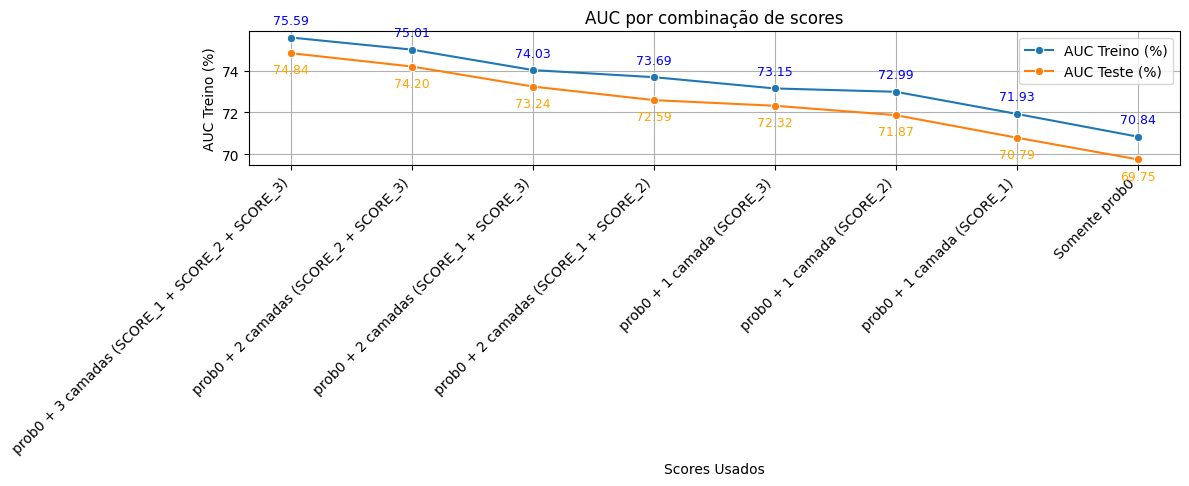

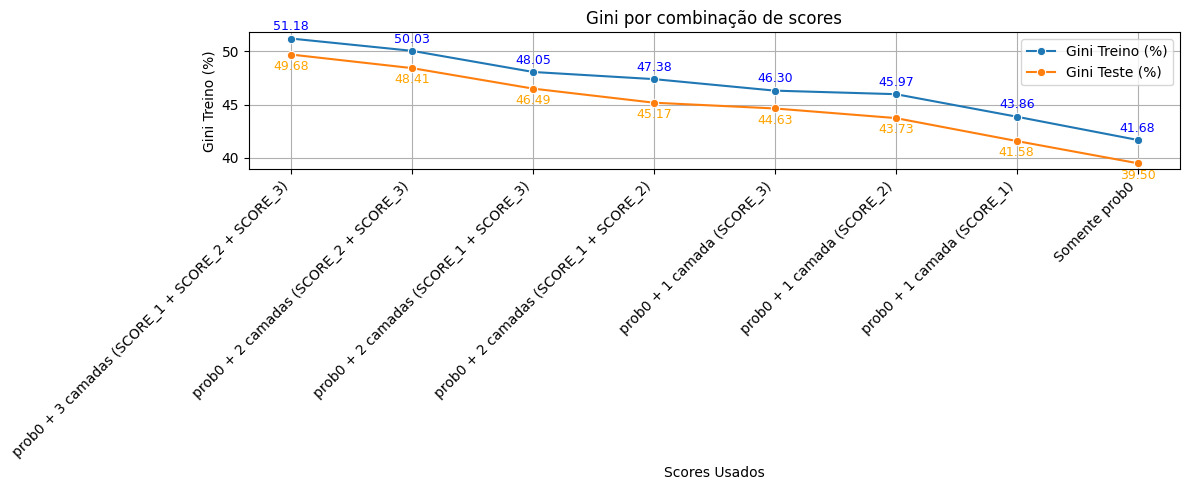

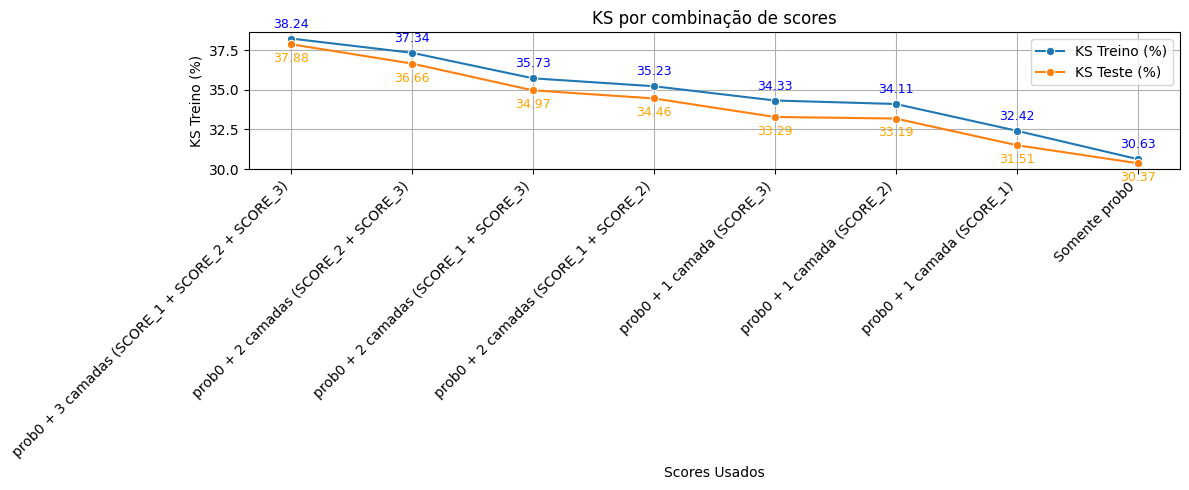

In [ ]:
# Resultados
df_resultados = pd.DataFrame({
    'Scores Usados': [
        'prob0 + 3 camadas (SCORE_1 + SCORE_2 + SCORE_3)',
        'prob0 + 2 camadas (SCORE_2 + SCORE_3)',
        'prob0 + 2 camadas (SCORE_1 + SCORE_3)',
        'prob0 + 2 camadas (SCORE_1 + SCORE_2)',
        'prob0 + 1 camada (SCORE_3)',
        'prob0 + 1 camada (SCORE_2)',
        'prob0 + 1 camada (SCORE_1)',
        'Somente prob0'
    ],
    'AUC Treino (%)': [75.59, 75.01, 74.03, 73.69, 73.15, 72.99, 71.93, 70.84],
    'AUC Teste (%)':  [74.84, 74.20, 73.24, 72.59, 72.32, 71.87, 70.79, 69.75],
    'Gini Treino (%)': [51.18, 50.03, 48.05, 47.38, 46.30, 45.97, 43.86, 41.68],
    'Gini Teste (%)':  [49.68, 48.41, 46.49, 45.17, 44.63, 43.73, 41.58, 39.50],
    'KS Treino (%)':  [38.24, 37.34, 35.73, 35.23, 34.33, 34.11, 32.42, 30.63],
    'KS Teste (%)':   [37.88, 36.66, 34.97, 34.46, 33.29, 33.19, 31.51, 30.37]
})

# Configurações de estilo
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (12, 5)

# Função para adicionar rótulos aos gráficos
def adicionar_rotulos(ax, x_labels, y_values, deslocamento, cor):
    for i, (x, y) in enumerate(zip(x_labels, y_values)):
        ax.text(i, y + deslocamento, f'{y:.2f}', ha='center', va='bottom' if deslocamento > 0 else 'top', fontsize=9, color=cor)

# Lista com os gráficos e suas colunas correspondentes
graficos = [
    ('AUC por combinação de scores', 'AUC Treino (%)', 'AUC Teste (%)'),
    ('Gini por combinação de scores', 'Gini Treino (%)', 'Gini Teste (%)'),
    ('KS por combinação de scores', 'KS Treino (%)', 'KS Teste (%)')
]

# Geração dos gráficos com rótulos
for titulo, col_treino, col_teste in graficos:
    plt.figure()
    ax = sns.lineplot(data=df_resultados, x='Scores Usados', y=col_treino, label=col_treino, marker='o')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_teste, label=col_teste, marker='o')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')

    # Adiciona rótulos
    x_labels = range(len(df_resultados))
    adicionar_rotulos(ax, x_labels, df_resultados[col_treino], deslocamento=0.5, cor='blue')
    adicionar_rotulos(ax, x_labels, df_resultados[col_teste], deslocamento=-0.5, cor='orange')

    plt.legend()
    plt.tight_layout()
    plt.show()

## Gráfico agrupando todos os resultados de performance dos modelos LightGBM

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

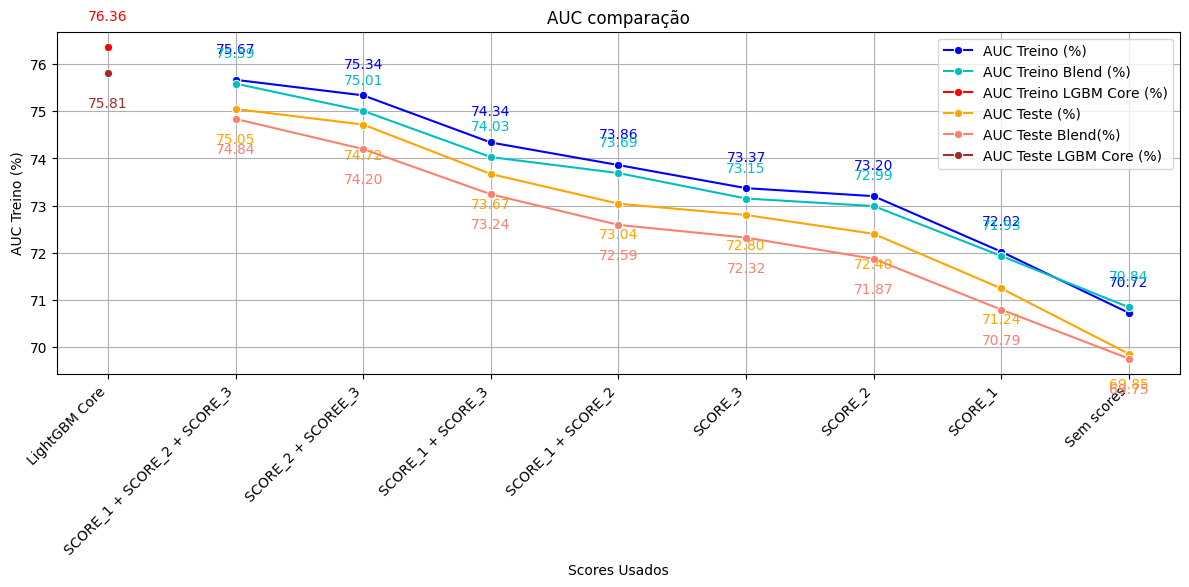

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

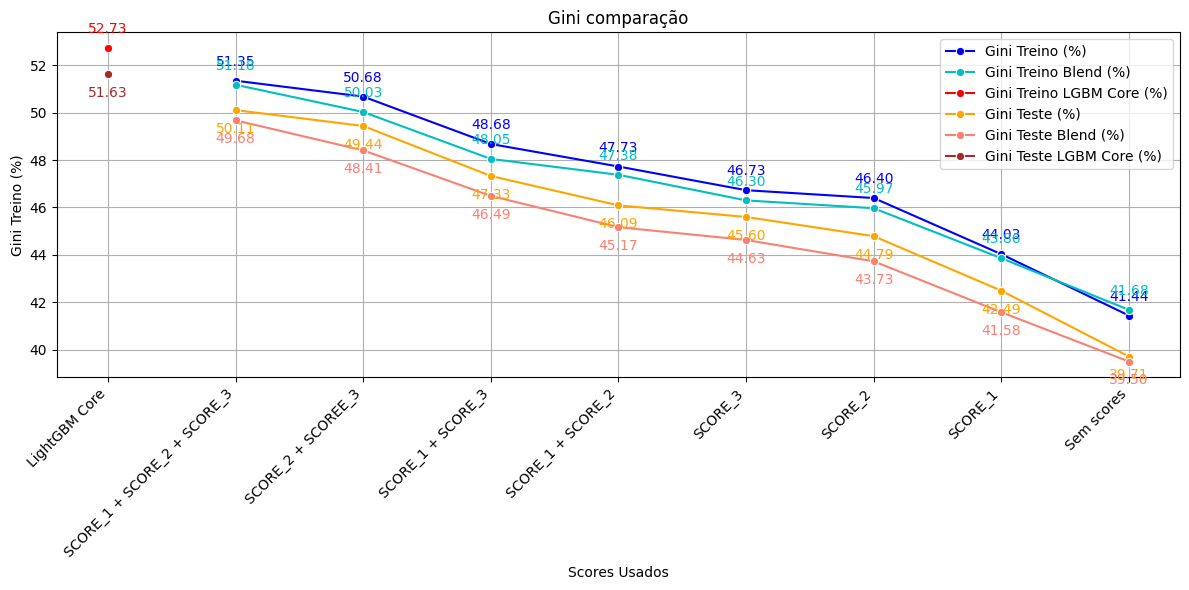

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

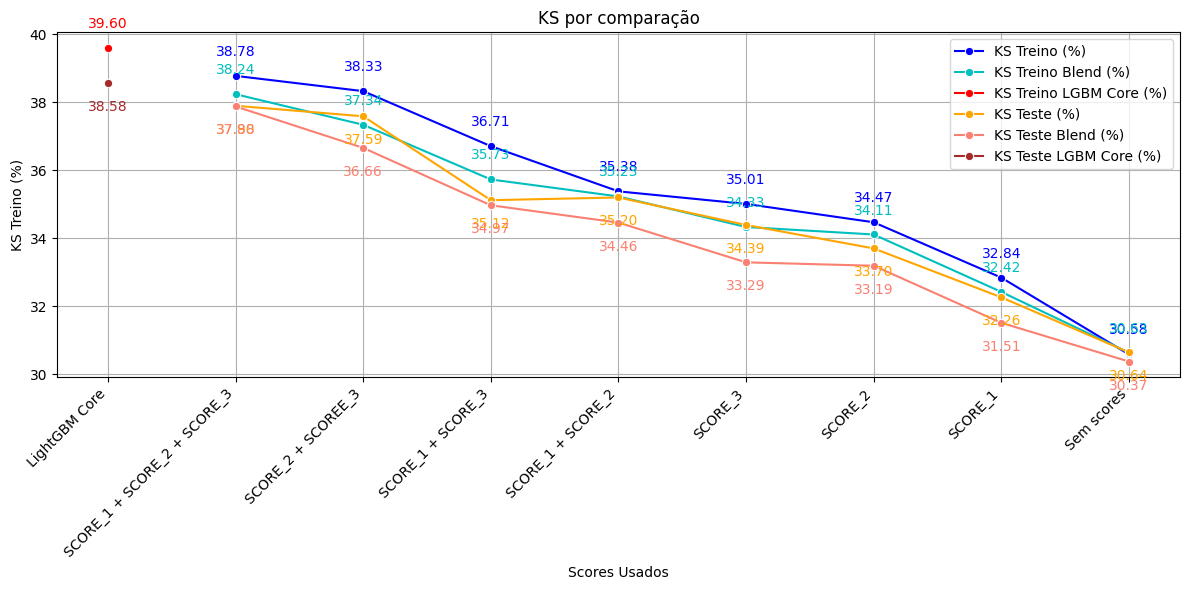

In [ ]:
# Dados de resultados
df_resultados = pd.DataFrame({
    'Scores Usados': [
        'LightGBM Core',
        'SCORE_1 + SCORE_2 + SCORE_3',
        'SCORE_2 + SCOREE_3',
        'SCORE_1 + SCORE_3',
        'SCORE_1 + SCORE_2',
        'SCORE_3',
        'SCORE_2',
        'SCORE_1',
        'Sem scores'
    ],
    'AUC Treino (%)': [np.nan, 75.67, 75.34, 74.34, 73.86, 73.37, 73.20, 72.02, 70.72],
    'AUC Treino Blend (%)': [np.nan, 75.59,	75.01,	74.03,	73.69,	73.15,	72.99,	71.93, 70.84],
    'AUC Treino LGBM Core (%)': [76.36, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'AUC Teste (%)':  [np.nan, 75.05, 74.72, 73.67, 73.04, 72.80, 72.40, 71.24, 69.85],
    'AUC Teste LGBM Core (%)':  [75.81, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'AUC Teste Blend(%)':  [np.nan, 74.84,	74.20,	73.24,	72.59,	72.32,	71.87,	70.79, 69.75],
    'Gini Treino (%)': [np.nan, 51.35, 50.68, 48.68, 47.73, 46.73, 46.40, 44.03, 41.44],
    'Gini Treino Blend (%)': [np.nan, 51.18, 50.03,	48.05, 47.38, 46.30, 45.97,	43.86, 41.68],
    'Gini Treino LGBM Core (%)': [52.73, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Gini Teste (%)':  [np.nan, 50.11, 49.44, 47.33, 46.09, 45.60, 44.79, 42.49, 39.71],
    'Gini Teste Blend (%)':  [np.nan, 49.68, 48.41,	46.49,	45.17, 44.63, 43.73, 41.58,	39.50],
    'Gini Teste LGBM Core (%)':  [51.63, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'KS Treino (%)':  [np.nan, 38.78, 38.33, 36.71, 35.38, 35.01, 34.47, 32.84, 30.58],
    'KS Treino Blend (%)':  [np.nan, 38.24,	37.34, 35.73, 35.23, 34.33,	34.11, 32.42, 30.63],
    'KS Treino LGBM Core (%)':  [39.60, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'KS Teste (%)':   [np.nan, 37.90, 37.59, 35.12, 35.20, 34.39, 33.70, 32.26, 30.64],
    'KS Teste Blend (%)':   [np.nan, 37.88,	36.66,	34.97, 34.46, 33.29, 33.19,	31.51, 30.37],
    'KS Teste LGBM Core (%)':   [38.58, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
})

# Configurações
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (12, 6)

# Função para adicionar rótulos aos gráficos
def adicionar_rotulos(ax, x_labels, y_values, deslocamento, cor):
    for i, (x, y) in enumerate(zip(x_labels, y_values)):
        ax.text(i, y + deslocamento, f'{y:.2f}', ha='center', va='bottom' if deslocamento > 0 else 'top', fontsize=10, color=cor)

# Lista com os gráficos e suas colunas correspondentes
graficos = [
    ('AUC comparação', 'AUC Treino (%)', 'AUC Treino Blend (%)', 'AUC Treino LGBM Core (%)', 'AUC Teste (%)', 'AUC Teste Blend(%)', 'AUC Teste LGBM Core (%)'),
    ('Gini comparação', 'Gini Treino (%)', 'Gini Treino Blend (%)', 'Gini Treino LGBM Core (%)', 'Gini Teste (%)', 'Gini Teste Blend (%)', 'Gini Teste LGBM Core (%)'),
    ('KS por comparação', 'KS Treino (%)', 'KS Treino Blend (%)', 'KS Treino LGBM Core (%)', 'KS Teste (%)', 'KS Teste Blend (%)', 'KS Teste LGBM Core (%)')
]

# Geração dos gráficos com rótulos
for titulo, col_treino, col_treino_blend, col_treino_core, col_teste, col_teste_blend, col_teste_core in graficos:
    plt.figure()
    ax = sns.lineplot(data=df_resultados, x='Scores Usados', y=col_treino, label=col_treino, marker='o', color='blue')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_treino_blend, label=col_treino_blend, marker='o', color='c')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_treino_core, label=col_treino_core, marker='o', color='red')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_teste, label=col_teste, marker='o', color='orange')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_teste_blend, label=col_teste_blend, marker='o', color='salmon')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_teste_core, label=col_teste_core, marker='o', color='brown')

    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')

    x_labels = range(len(df_resultados))

    # Rótulos nos pontos
    adicionar_rotulos(ax, x_labels, df_resultados[col_treino], deslocamento=0.5, cor='blue')
    adicionar_rotulos(ax, x_labels, df_resultados[col_treino_blend], deslocamento=0.5, cor='c')
    adicionar_rotulos(ax, x_labels, df_resultados[col_treino_core], deslocamento=0.5, cor='red')
    adicionar_rotulos(ax, x_labels, df_resultados[col_teste], deslocamento=-0.5, cor='orange')
    adicionar_rotulos(ax, x_labels, df_resultados[col_teste_blend], deslocamento=-0.5, cor='salmon')
    adicionar_rotulos(ax, x_labels, df_resultados[col_teste_core], deslocamento=-0.5, cor='brown')

    plt.legend()
    plt.tight_layout()
    plt.show()